In [1]:
#	TODO visualizaciones: 
#		-cambios en base a rotacion
#		-cambios en base a tempreratura
#		-cambios en base a g

#		-distribucion de los datos por variable
#		-rango de las variables

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import RandomState

# constants
path = 'C:/Users/Asus/Documents/2023_2/Memoria/src'

red = '5F0003'
blue = '206ED5'
orange = 'F38735'

# Ostar
O_df = pd.read_csv(path+'/Data/o_spectral_lines_trim.csv')
# Bstar
B_df = pd.read_csv(path+'/Data/b_spectral_lines_trim.csv')
# Observed spectra
Obs_df = pd.read_csv(path+'/Data/observed_spectral_lines_trim_v2.csv')

In [3]:
# src = https://medium.com/@BrendanArtley/matplotlib-color-gradients-21374910584b
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

In [4]:
def tendencyLine(spectra,c,paramValue=None,ax=None):
	if ax:
		ax.plot([float(i) for i in spectra.keys()],spectra.values,c=c)
	else:
		plt.plot([float(i) for i in spectra.keys()],spectra.values,c=c)

# O-Star

- Paremeter grid

<img src="./img/stellarParametersO.jpg" width="500"/>

### Distributions

In [5]:
# plt.bar(
#   x=[27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50, 52.5, 55],
#   height=O_df.temperature.value_counts().values,
#   width=1,
#   linewidth=5)
# plt.title('Distribucion de Temperaturas')
# plt.xlabel('T[kK]')
# plt.ylabel('Frecuencia')
# plt.tight_layout()
# plt.show()

In [6]:
# dataframe setup
target = ['temperature','g','v']
x = O_df.drop(target,axis=1)
y = O_df[target]

In [7]:
y.describe()

,temperature,g,v
count,24450.000000,24450.000000,24450.00000
mean,21852.760736,3.575153,226.50000
std,4593.010759,0.776953,129.90358
min,15000.000000,1.750000,3.00000
25%,18000.000000,3.000000,114.00000
50%,22000.000000,3.500000,226.50000
75%,26000.000000,4.250000,339.00000
max,30000.000000,4.750000,450.00000


In [8]:
# parametra values lists
t_list = y['temperature'].unique()
g_list = y['g'].unique()
v_list = y['v'].unique()

- Tendencia temperatura

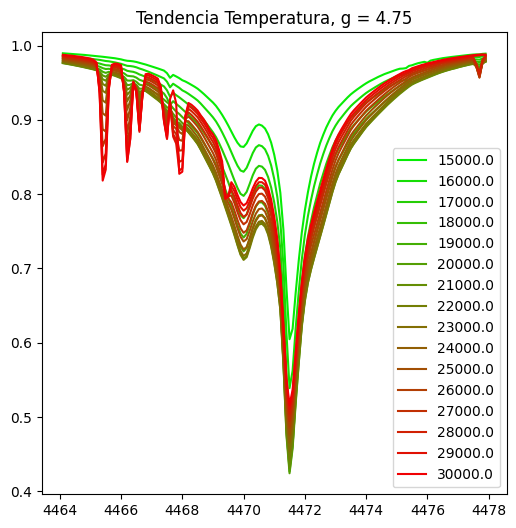

In [9]:
g = g_list[-1]
v = y[y.g == g].v.min()
matchingTemperatures = y[y.g == g].temperature.unique()
matchingTemperatures.sort()

color = get_color_gradient(blue,red,len(matchingTemperatures))

plt.figure(figsize=(6,6))

for i,t in enumerate(matchingTemperatures):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], color[i])

plt.legend(matchingTemperatures)
plt.title('Tendencia Temperatura, g = '+ str(g))
plt.show()

- Tendencia en log g

In [10]:
# plt.bar(
#   x=[ 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5,4.750],
#   height=O_df.g.value_counts().values,
#   width=0.125,
#   linewidth=5)
# plt.title('Distribucion de Temperaturas')
# plt.xlabel('log g[g]')
# plt.ylabel('Frecuencia')
# plt.tight_layout()
# plt.show()

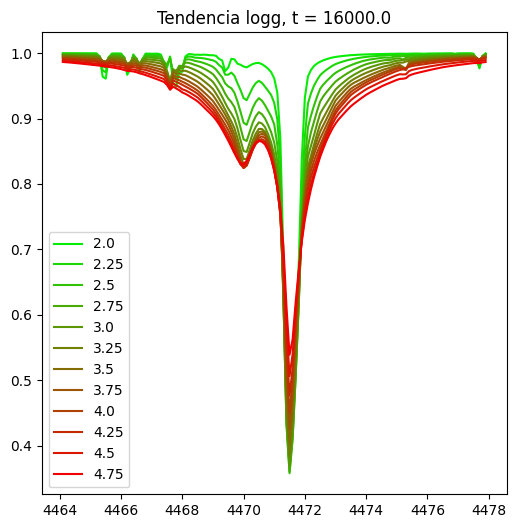

In [11]:
t = t_list[1]
v = y[y.temperature == t].v.min()
matchingGs = y[y.temperature == t].g.unique()

color = get_color_gradient(blue,red,len(matchingGs))

plt.figure(figsize=(6,6))

for i,g in enumerate(matchingGs):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], color[i])

plt.legend(matchingGs)
plt.title('Tendencia logg, t = '+str(t))
plt.show()

- Tendencia en V

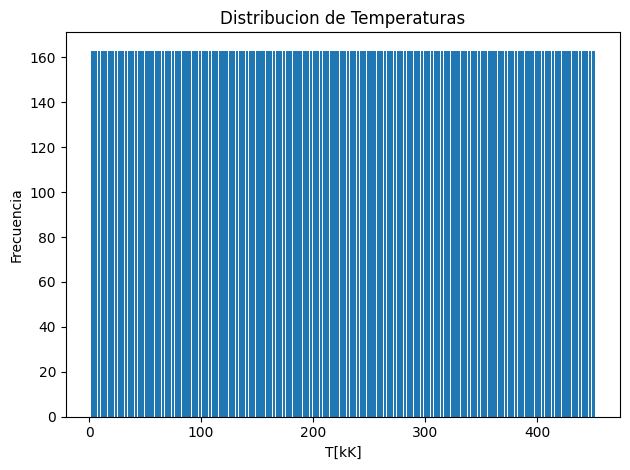

In [12]:
plt.bar(
  x=[i for i in range(3,451,3)],
  height=O_df.v.value_counts().values,
  width=2.5,)
plt.title('Distribucion de Temperaturas')
plt.xlabel('T[kK]')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

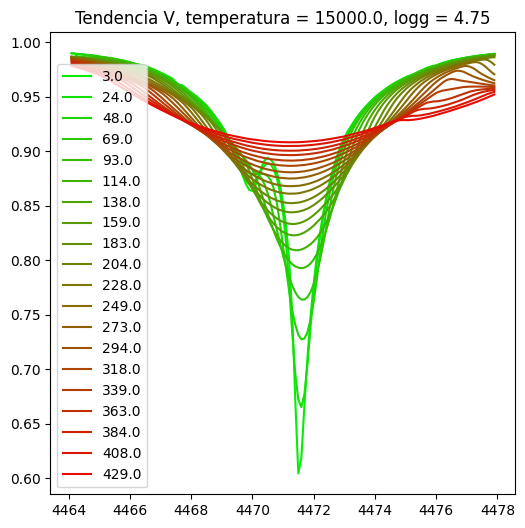

In [13]:
import math

g = g_list.max()
t = y[y.g == g].temperature.min()
matchingVs = y[(y.g == g) & (y.temperature == t)].v.unique()
matchingVs.sort()

color = get_color_gradient(blue,red,len(matchingVs))

plt.figure(figsize=(6,6))

n = 20
plotedVs = []

for i in [math.floor(j*len(matchingVs)/n) for j in range(n)]:
  value = matchingVs[i] 
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == value)].index[0]
  tendencyLine(x.iloc[spectraIndex],color[i])
  plotedVs.append(value)

plt.legend(plotedVs)
plt.title('Tendencia V, temperatura = '+ str(t) + ', logg = '+ str(g))
plt.show()

# B-Star

- parameter grid

<img src="./img/stellarParametersB.jpg" width="500"/>

- Tendencia en Temperatura

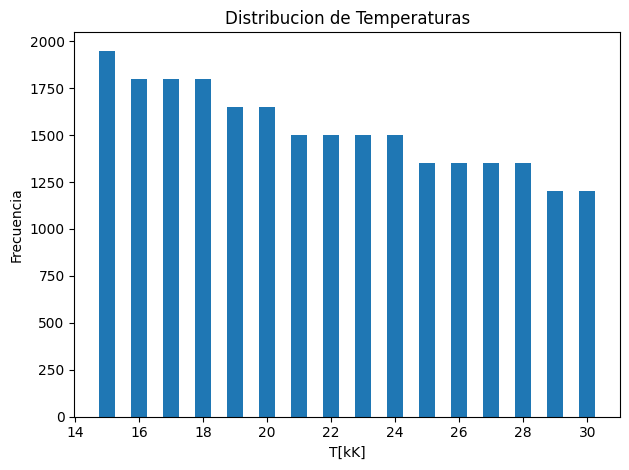

In [14]:
plt.bar(
  x=[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
  height=B_df.temperature.value_counts().values,
  width=0.5,
  linewidth=5)
plt.title('Distribucion de Temperaturas')
plt.xlabel('T[kK]')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [15]:
# dataframe setup
target = ['temperature','g','v']
x = B_df.drop(target,axis=1)
y = B_df[target]

In [16]:
y.describe()

,temperature,g,v
count,24450.000000,24450.000000,24450.00000
mean,21852.760736,3.575153,226.50000
std,4593.010759,0.776953,129.90358
min,15000.000000,1.750000,3.00000
25%,18000.000000,3.000000,114.00000
50%,22000.000000,3.500000,226.50000
75%,26000.000000,4.250000,339.00000
max,30000.000000,4.750000,450.00000


In [17]:
# parametra values lists
t_list = y['temperature'].unique()
g_list = y['g'].unique()
v_list = y['v'].unique()

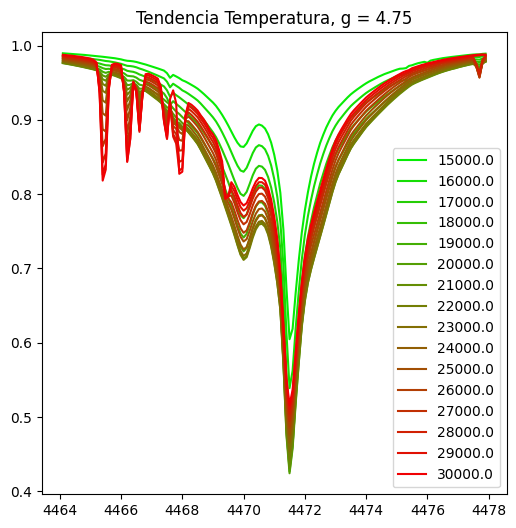

In [18]:
g = g_list[-1]
v = y[y.g == g].v.min()
matchingTemperatures = y[(y.g == g) & (y.v == v)].temperature.unique()

color = get_color_gradient(blue,red,len(matchingTemperatures))

plt.figure(figsize=(6,6))

for i,t in enumerate(matchingTemperatures):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], color[i])

plt.legend(matchingTemperatures)
plt.title('Tendencia Temperatura, g = '+ str(g))
plt.show()

- Tendencia en log g

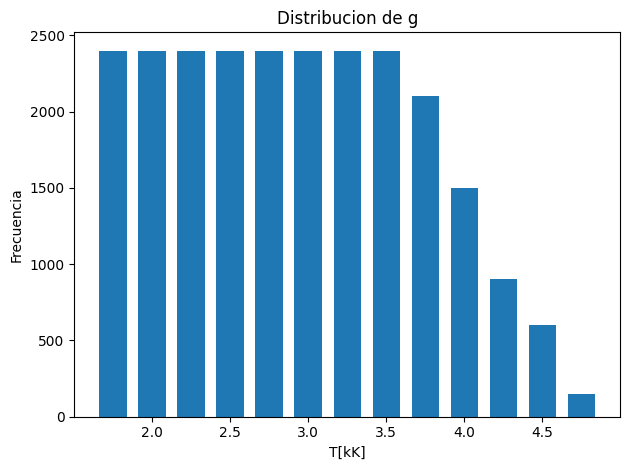

In [19]:
plt.bar(
  x=[1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75],
  height=B_df.g.value_counts().values,
  width=0.175,
  linewidth=5)
plt.title('Distribucion de g')
plt.xlabel('T[kK]')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

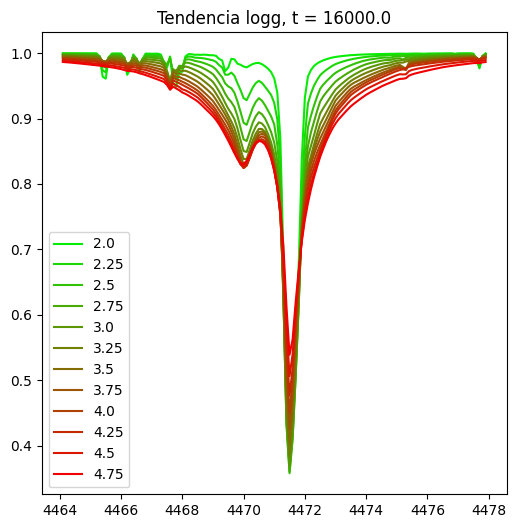

In [20]:
t = t_list[1]
v = y[y.temperature == t].v.min()
matchingGs = y[y.temperature == t].g.unique()

color = get_color_gradient(blue,red,len(matchingGs))

plt.figure(figsize=(6,6))

for i,g in enumerate(matchingGs):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], color[i])

plt.legend(matchingGs)
plt.title('Tendencia logg, t = '+str(t))
plt.show()

- Tendencia en V

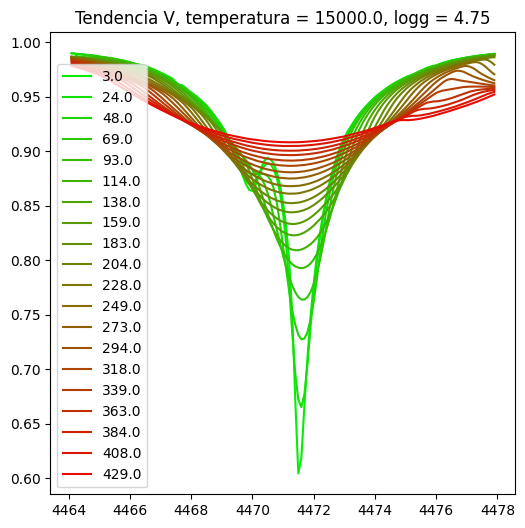

In [21]:
import math

g = g_list.max()
t = y[y.g == g].temperature.min()
matchingVs = y[(y.g == g) & (y.temperature == t)].v.unique()
matchingVs.sort()

color = get_color_gradient(blue,red,len(matchingVs))

plt.figure(figsize=(6,6))

n = 20
plotedVs = []

for i in [math.floor(j*len(matchingVs)/n) for j in range(n)]:
  value = matchingVs[i] 
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == value)].index[0]
  tendencyLine(x.iloc[spectraIndex], color[i])
  plotedVs.append(value)

plt.legend(plotedVs)
plt.title('Tendencia V, temperatura = '+ str(t) + ', logg = '+ str(g))
plt.show()

# Observed Data

In [22]:
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

In [23]:
# dataframe setup
target = ['temperature','g','v']

x_obs = Obs_df.drop(target+['HD','date','time'],axis=1)
y_obs = Obs_df[target]

x = B_df.drop(target,axis=1)
y = B_df[target]

In [24]:
nearest = []
for obs_parameters in y_obs.to_numpy():
	neighbor = []
	for param_index in range(len(target)):
		v, _ = find_nearest(y.iloc[:,param_index].values,obs_parameters[param_index])
		neighbor.append(v)
	nearest.append(neighbor)
 
nearest_index = []
for neighbor in nearest:
	nearest_index.append(y[(y.temperature == neighbor[0]) & (y.g == neighbor[1]) & (y.v == neighbor[2])].index[0])
  

### Observed spectra neighborhood(commented)

In [27]:
# get neighbourhoods
neighborhoods = []

neighborhood_dim = [
	5,
	5,
	9,
]

for obs_parameters in y_obs.to_numpy():
	star_neighborhood = []
	for param_index in range(len(target)):
		parameter_neighborhood = []
		search_list = list(y.iloc[:,param_index].unique())
		for j in range(neighborhood_dim[param_index]):	
			_, i = find_nearest(search_list,obs_parameters[param_index])
			parameter_neighborhood.append(search_list.pop(i))
		parameter_neighborhood.sort()
		star_neighborhood.append(parameter_neighborhood)
	neighborhoods.append(star_neighborhood)

In [63]:
#fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7,6))
#
#n_t = nearest[index][0]
#n_g = nearest[index][1]
#n_v = nearest[index][2]
#
#params = neighborhoods[index]
#
## temperature
#color = get_color_gradient(blue,red,len(params[0]))
#for i, value in enumerate(params[0]):
#	plt_index = y[(y.temperature == value) & (y.g == n_g) & (y.v == n_v)].index[0]
#	tendencyLine(x.iloc[plt_index,:],c=color[i],ax=axes[0])
#axes[0].set_xlabel('Frecuencia[Hz]')
#axes[0].set_ylabel('Intensidad')
#axes[0].legend([str(i) for i in params[0]])
#
#color = get_color_gradient(blue,red,len(params[1]))
#for i, value in enumerate(params[1]):
#	plt_index = y[(y.temperature == n_t) & (y.g == value) & (y.v == n_v)].index[0]
#	tendencyLine(x.iloc[plt_index,:],c=color[i],ax=axes[1])
#axes[1].set_xlabel('Frecuencia[Hz]')
#axes[1].set_ylabel('Intensidad')
#axes[1].legend([str(i) for i in params[1]])
#
#color = get_color_gradient(blue,red,len(params[2]))
#v_param = params[2]
#v_param.pop(7);v_param.pop(5);v_param.pop(3);v_param.pop(1)
#for i, value in enumerate(params[2]):
#	plt_index = y[(y.temperature == n_t) & (y.g == n_g) & (y.v == value)].index[0]
#	tendencyLine(x.iloc[plt_index,:],c=color[i],ax=axes[2])
#axes[2].set_xlabel('Frecuencia[Hz]')
#axes[2].set_ylabel('Intensidad')
#axes[2].legend([str(i) for i in params[2]])
#
#tendencyLine(x_obs.iloc[index],c='blue',ax=axes[0])
#tendencyLine(x_obs.iloc[index],c='blue',ax=axes[1])
#tendencyLine(x_obs.iloc[index],c='blue',ax=axes[2])
#
#
#plt.tight_layout();
#plt.show()

### Most representative spectra

In [29]:
def get_closest_spectra_line(index):
  obs = x_obs.iloc[index]
  min_dist = np.inf
  min_dist_index = -1
  dist = []
  for i, line in enumerate(x.to_numpy()):
    
    d = np.sum((obs - line)**2/line)
    if d < min_dist:
      min_dist = d
      min_dist_index = i
      
  return min_dist_index

In [40]:
index = Obs_df[
  (Obs_df.HD == 50013) & 
  (Obs_df.date == '2015-10-23') & 
  (Obs_df.time == '07-01-56')
  ].index[0]

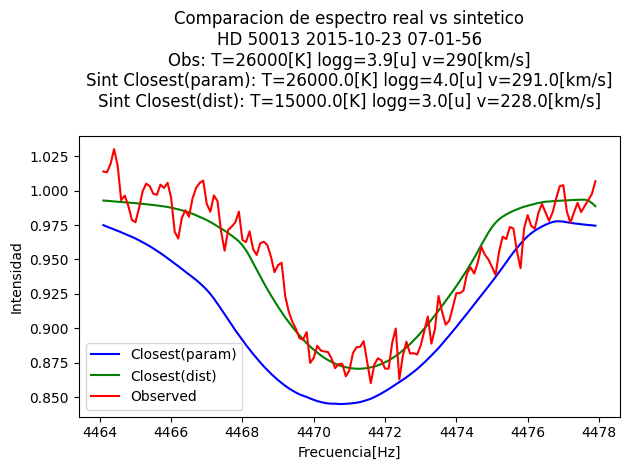

In [41]:
ind = get_closest_spectra_line(index)

tendencyLine(x.iloc[nearest_index[index]],c='blue')
tendencyLine(x.iloc[ind]
             #+np.random.normal(loc=0, scale=0.02, size=x.iloc[nearest_index[index]].shape)
             ,c='green')
tendencyLine(x_obs.iloc[index],c='red')

plt.title('Comparacion de espectro real vs sintetico\n' +
          'HD '+str(Obs_df.HD.iloc[index])+' '+str(Obs_df.date.iloc[index])+' '+str(Obs_df.time.iloc[index])+'\n'+
          'Obs: T=' + str(y_obs.temperature[index])+'[K] ' +
          'logg=' + str(y_obs.g[index])+'[u] ' +
          'v=' + str(y_obs.v[index])+'[km/s]\n'+
          
          'Sint Closest(param): T=' + str(y.temperature[nearest_index[index]])+'[K] ' +
          'logg=' + str(y.g[nearest_index[index]])+'[u] ' +
          'v=' + str(y.v[nearest_index[index]])+'[km/s]\n'+
          
          'Sint Closest(dist): T=' + str(y.temperature[ind])+'[K] ' +
          'logg=' + str(y.g[ind])+'[u] ' +
          'v=' + str(y.v[ind])+'[km/s]\n')

plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Intensidad')
plt.legend(['Closest(param)','Closest(dist)','Observed'])
plt.tight_layout()
plt.show()

prediccion:

	- T: 19314 ± 2584	log g: 3.05 ± 0.04	v: 252 ± 16	

In [45]:
index = Obs_df[
  (Obs_df.HD == 56014) & 
  (Obs_df.date == '2014-03-19') & 
  (Obs_df.time == '01-26-20')
  ].index[0]

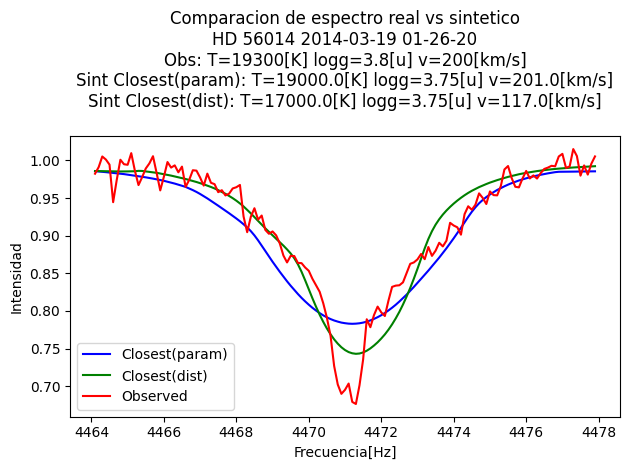

In [46]:
ind = get_closest_spectra_line(index)

tendencyLine(x.iloc[nearest_index[index]],c='blue')
tendencyLine(x.iloc[ind]
             #+np.random.normal(loc=0, scale=0.02, size=x.iloc[nearest_index[index]].shape)
             ,c='green')
tendencyLine(x_obs.iloc[index],c='red')

plt.title('Comparacion de espectro real vs sintetico\n' +
          'HD '+str(Obs_df.HD.iloc[index])+' '+str(Obs_df.date.iloc[index])+' '+str(Obs_df.time.iloc[index])+'\n'+
          'Obs: T=' + str(y_obs.temperature[index])+'[K] ' +
          'logg=' + str(y_obs.g[index])+'[u] ' +
          'v=' + str(y_obs.v[index])+'[km/s]\n'+
          
          'Sint Closest(param): T=' + str(y.temperature[nearest_index[index]])+'[K] ' +
          'logg=' + str(y.g[nearest_index[index]])+'[u] ' +
          'v=' + str(y.v[nearest_index[index]])+'[km/s]\n'+
          
          'Sint Closest(dist): T=' + str(y.temperature[ind])+'[K] ' +
          'logg=' + str(y.g[ind])+'[u] ' +
          'v=' + str(y.v[ind])+'[km/s]\n')

plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Intensidad')
plt.legend(['Closest(param)','Closest(dist)','Observed'])
plt.tight_layout()
plt.show()

prediccion:

	- T: 16866 ± 278	log g: 3.65 ± 0.19	v: 146 ± 6

In [48]:
index = Obs_df[
  (Obs_df.HD == 35411) & 
  (Obs_df.date == '2015-02-27') & 
  (Obs_df.time == '00-42-38')
  ].index[0]

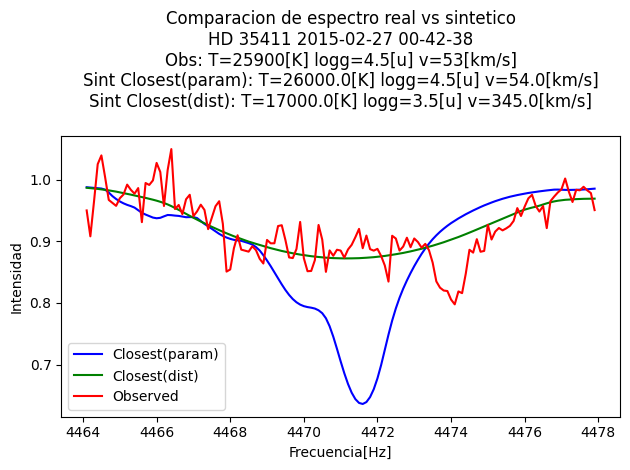

In [49]:
ind = get_closest_spectra_line(index)

tendencyLine(x.iloc[nearest_index[index]],c='blue')
tendencyLine(x.iloc[ind]
             #+np.random.normal(loc=0, scale=0.02, size=x.iloc[nearest_index[index]].shape)
             ,c='green')
tendencyLine(x_obs.iloc[index],c='red')

plt.title('Comparacion de espectro real vs sintetico\n' +
          'HD '+str(Obs_df.HD.iloc[index])+' '+str(Obs_df.date.iloc[index])+' '+str(Obs_df.time.iloc[index])+'\n'+
          'Obs: T=' + str(y_obs.temperature[index])+'[K] ' +
          'logg=' + str(y_obs.g[index])+'[u] ' +
          'v=' + str(y_obs.v[index])+'[km/s]\n'+
          
          'Sint Closest(param): T=' + str(y.temperature[nearest_index[index]])+'[K] ' +
          'logg=' + str(y.g[nearest_index[index]])+'[u] ' +
          'v=' + str(y.v[nearest_index[index]])+'[km/s]\n'+
          
          'Sint Closest(dist): T=' + str(y.temperature[ind])+'[K] ' +
          'logg=' + str(y.g[ind])+'[u] ' +
          'v=' + str(y.v[ind])+'[km/s]\n')

plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Intensidad')
plt.legend(['Closest(param)','Closest(dist)','Observed'])
plt.tight_layout()
plt.show()

prediccion:

	-T: 18939 ± 2495	log g: 3.14 ± 0.11	v: 353 ± 19	

In [52]:
index = Obs_df[
  (Obs_df.HD == 37041) & 
  (Obs_df.date == '2015-02-26') & 
  (Obs_df.time == '00-50-02')
  ].index[0]

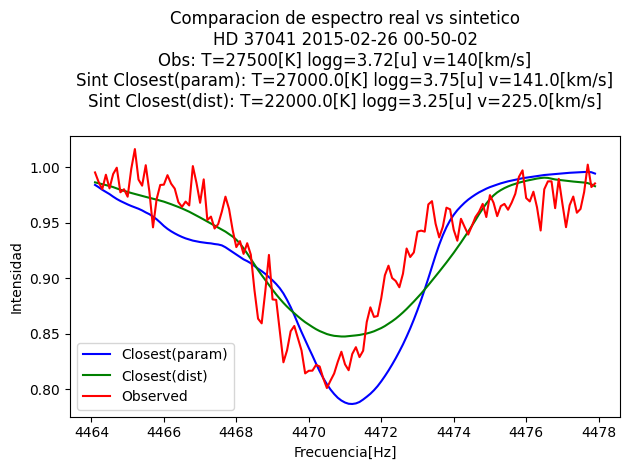

In [54]:
ind = get_closest_spectra_line(index)

tendencyLine(x.iloc[nearest_index[index]],c='blue')
tendencyLine(x.iloc[ind]
             #+np.random.normal(loc=0, scale=0.02, size=x.iloc[nearest_index[index]].shape)
             ,c='green')
tendencyLine(x_obs.iloc[index],c='red')

plt.title('Comparacion de espectro real vs sintetico\n' +
          'HD '+str(Obs_df.HD.iloc[index])+' '+str(Obs_df.date.iloc[index])+' '+str(Obs_df.time.iloc[index])+'\n'+
          'Obs: T=' + str(y_obs.temperature[index])+'[K] ' +
          'logg=' + str(y_obs.g[index])+'[u] ' +
          'v=' + str(y_obs.v[index])+'[km/s]\n'+
          
          'Sint Closest(param): T=' + str(y.temperature[nearest_index[index]])+'[K] ' +
          'logg=' + str(y.g[nearest_index[index]])+'[u] ' +
          'v=' + str(y.v[nearest_index[index]])+'[km/s]\n'+
          
          'Sint Closest(dist): T=' + str(y.temperature[ind])+'[K] ' +
          'logg=' + str(y.g[ind])+'[u] ' +
          'v=' + str(y.v[ind])+'[km/s]\n')

plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Intensidad')
plt.legend(['Closest(param)','Closest(dist)','Observed'])
plt.tight_layout()
plt.show()

prediccion

	- T: 21999 ± 602	log g: 3.17 ± 0.09	v: 244 ± 9	

In [55]:
index = Obs_df[
  (Obs_df.HD == 52918) & 
  (Obs_df.date == '2014-01-29') & 
  (Obs_df.time == '03-18-58')
  ].index[0]

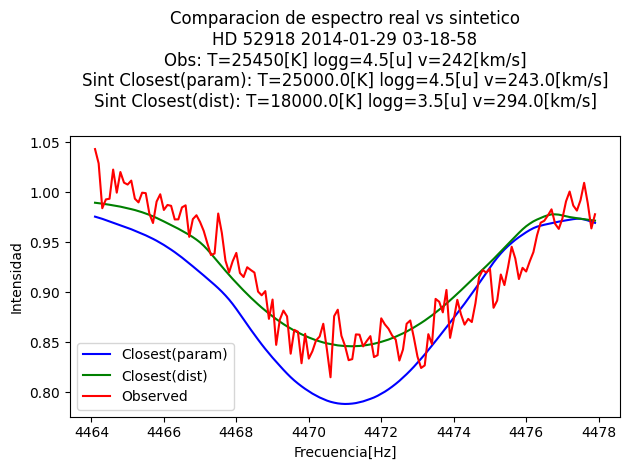

In [56]:
ind = get_closest_spectra_line(index)

tendencyLine(x.iloc[nearest_index[index]],c='blue')
tendencyLine(x.iloc[ind]
             #+np.random.normal(loc=0, scale=0.02, size=x.iloc[nearest_index[index]].shape)
             ,c='green')
tendencyLine(x_obs.iloc[index],c='red')

plt.title('Comparacion de espectro real vs sintetico\n' +
          'HD '+str(Obs_df.HD.iloc[index])+' '+str(Obs_df.date.iloc[index])+' '+str(Obs_df.time.iloc[index])+'\n'+
          'Obs: T=' + str(y_obs.temperature[index])+'[K] ' +
          'logg=' + str(y_obs.g[index])+'[u] ' +
          'v=' + str(y_obs.v[index])+'[km/s]\n'+
          
          'Sint Closest(param): T=' + str(y.temperature[nearest_index[index]])+'[K] ' +
          'logg=' + str(y.g[nearest_index[index]])+'[u] ' +
          'v=' + str(y.v[nearest_index[index]])+'[km/s]\n'+
          
          'Sint Closest(dist): T=' + str(y.temperature[ind])+'[K] ' +
          'logg=' + str(y.g[ind])+'[u] ' +
          'v=' + str(y.v[ind])+'[km/s]\n')

plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Intensidad')
plt.legend(['Closest(param)','Closest(dist)','Observed'])
plt.tight_layout()
plt.show()

prediccion

	- T: 17739 ± 320	log g: 3.49 ± 0.08	v: 320 ± 18	

In [61]:
index = Obs_df[
  (Obs_df.HD == 35165) & 
  (Obs_df.date == '2015-11-14') & 
  (Obs_df.time == '04-22-43')
  ].index[0]

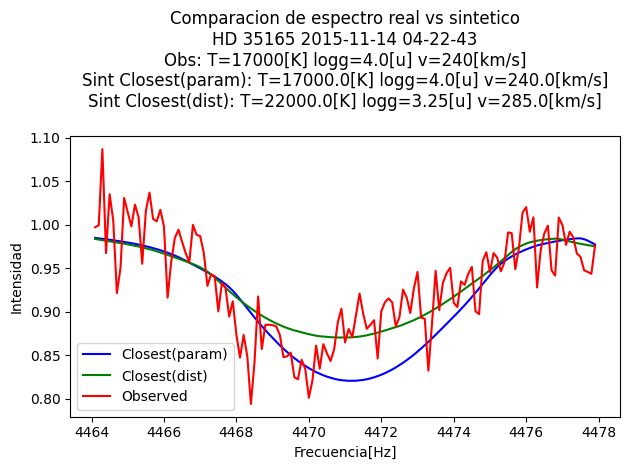

In [62]:
ind = get_closest_spectra_line(index)

tendencyLine(x.iloc[nearest_index[index]],c='blue')
tendencyLine(x.iloc[ind]
             #+np.random.normal(loc=0, scale=0.02, size=x.iloc[nearest_index[index]].shape)
             ,c='green')
tendencyLine(x_obs.iloc[index],c='red')

plt.title('Comparacion de espectro real vs sintetico\n' +
          'HD '+str(Obs_df.HD.iloc[index])+' '+str(Obs_df.date.iloc[index])+' '+str(Obs_df.time.iloc[index])+'\n'+
          'Obs: T=' + str(y_obs.temperature[index])+'[K] ' +
          'logg=' + str(y_obs.g[index])+'[u] ' +
          'v=' + str(y_obs.v[index])+'[km/s]\n'+
          
          'Sint Closest(param): T=' + str(y.temperature[nearest_index[index]])+'[K] ' +
          'logg=' + str(y.g[nearest_index[index]])+'[u] ' +
          'v=' + str(y.v[nearest_index[index]])+'[km/s]\n'+
          
          'Sint Closest(dist): T=' + str(y.temperature[ind])+'[K] ' +
          'logg=' + str(y.g[ind])+'[u] ' +
          'v=' + str(y.v[ind])+'[km/s]\n')

plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Intensidad')
plt.legend(['Closest(param)','Closest(dist)','Observed'])
plt.tight_layout()
plt.show()

prediccion

	- T: 23213 ± 528	log g: 3.38 ± 0.14	v: 308 ± 20

In [66]:
index = Obs_df[
  (Obs_df.HD == 48917) & 
  (Obs_df.date == '2015-10-23') & 
  (Obs_df.time == '07-42-37')
  ].index[0]

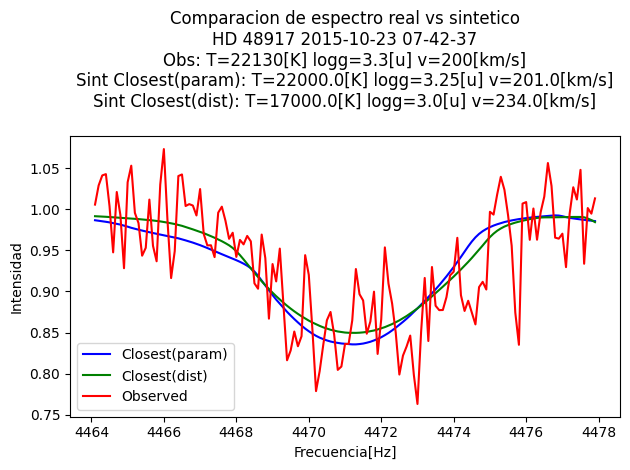

In [67]:
ind = get_closest_spectra_line(index)

tendencyLine(x.iloc[nearest_index[index]],c='blue')
tendencyLine(x.iloc[ind]
             #+np.random.normal(loc=0, scale=0.02, size=x.iloc[nearest_index[index]].shape)
             ,c='green')
tendencyLine(x_obs.iloc[index],c='red')

plt.title('Comparacion de espectro real vs sintetico\n' +
          'HD '+str(Obs_df.HD.iloc[index])+' '+str(Obs_df.date.iloc[index])+' '+str(Obs_df.time.iloc[index])+'\n'+
          'Obs: T=' + str(y_obs.temperature[index])+'[K] ' +
          'logg=' + str(y_obs.g[index])+'[u] ' +
          'v=' + str(y_obs.v[index])+'[km/s]\n'+
          
          'Sint Closest(param): T=' + str(y.temperature[nearest_index[index]])+'[K] ' +
          'logg=' + str(y.g[nearest_index[index]])+'[u] ' +
          'v=' + str(y.v[nearest_index[index]])+'[km/s]\n'+
          
          'Sint Closest(dist): T=' + str(y.temperature[ind])+'[K] ' +
          'logg=' + str(y.g[ind])+'[u] ' +
          'v=' + str(y.v[ind])+'[km/s]\n')

plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Intensidad')
plt.legend(['Closest(param)','Closest(dist)','Observed'])
plt.tight_layout()
plt.show()

prediccion

	- T: 16789 ± 818	log g: 2.93 ± 0.13 	v: 256 ± 21	